In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import matplotlib.pyplot as plt
import cv2

In [3]:
len(os.listdir('/kaggle/input/global-wheat-detection/train'))

3422

944c60a15.jpg


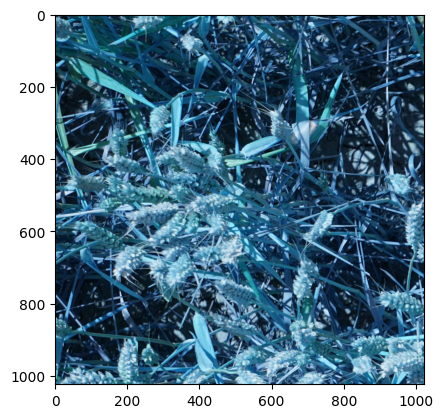

In [4]:
for file in os.listdir('/kaggle/input/global-wheat-detection/train'):
    image = os.path.join('/kaggle/input/global-wheat-detection/train',file)
    print(file)
    img = cv2.imread(image)
    plt.imshow(img)
    break
    

In [5]:
df = pd.read_csv('/kaggle/input/global-wheat-detection/train.csv')

In [6]:
df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [7]:
df['image_id'].unique()

array(['b6ab77fd7', 'b53afdf5c', '7b72ea0fb', ..., 'a5c8d5f5c',
       'e6b5e296d', '5e0747034'], dtype=object)

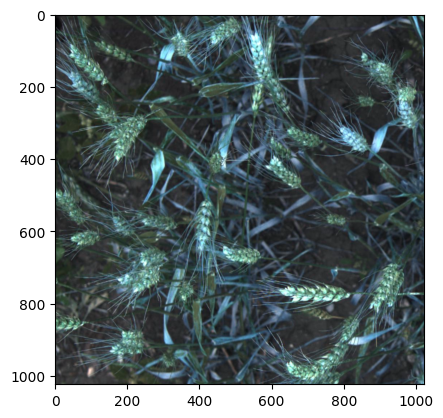

In [8]:
plt.imshow(cv2.imread('/kaggle/input/global-wheat-detection/train/b6ab77fd7.jpg'))

In [ ]:
image = cv2.imread('/kaggle/input/global-wheat-detection/train/b6ab77fd7.jpg')
x_min = 834.0
y_min = 222.0
x_max = (834.0+56.0)
y_max = (222.0+36.0)

cv2.rectangle(image,(int(x_min),int(y_min),int(x_max),int(y_max)),(0,255,0),2)
x_min = 226.0
y_min = 548.0
x_max = (226.0+130.0)
y_max = (548.0+58.0)

cv2.rectangle(image,(int(x_min),int(y_min),int(x_max),int(y_max)),(0,255,0),2)
x_min = 834.0
y_min = 95.0
x_max = (834.0+109.0)
y_max = (95.0+107.0)

cv2.rectangle(image,(int(x_min),int(y_min),int(x_max),int(y_max)),(0,255,0),2)

plt.imshow(image)


Let's visualize one image with all the bboxes for that image

In [ ]:
one_image_info = df[df['image_id']=='b53afdf5c']
one_image_info.head()

In [ ]:
(one_image_info['bbox'].iloc[0][0])

In [ ]:
one_image_info['X_min'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[0]))
one_image_info['y_min'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[1]))
one_image_info['X_max'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[2])+float(x.strip('[]').split(',')[0]))
one_image_info['y_max'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[3])+float(x.strip('[]').split(',')[1]))
one_image_info['W'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[2]))
one_image_info['H'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[3]))

In [ ]:
one_image_info

In [ ]:
bboxes = one_image_info[['X_min','y_min','X_max','y_max']].values

In [ ]:
for bbox in bboxes:
    # print(bbox)
    x1,y1,x2,y2 = bbox
    # print(x1,y1,x2,y2)
    cv2.rectangle(image,(int(x1),int(y1)),(int(x2),int(y2)),(0,255,0),2)

In [ ]:
image = cv2.imread('/kaggle/input/global-wheat-detection/train/b53afdf5c.jpg')
for bbox in bboxes:
    x1,y1,x2,y2 = bbox
    cv2.rectangle(image,(int(x1),int(y1)),(int(x2),int(y2)),(255,0,0),4)
    # break
plt.imshow(image)
    

In [ ]:
import random

In [ ]:
#Let's do this for a random picture

random.choice(df['image_id'].unique())

In [ ]:
#function for creating the image with boxes
random_image_id = random.choice(df['image_id'].unique())
image_info = df[df['image_id']==random_image_id]
image_info['X_min'] = image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[0]));
image_info['y_min'] = image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[1]));
image_info['X_max'] = image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[2])+float(x.strip('[]').split(',')[0]));
image_info['y_max'] = image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[3])+float(x.strip('[]').split(',')[1]));
bboxes = image_info[['X_min','y_min','X_max','y_max']].values
image = cv2.imread(f'/kaggle/input/global-wheat-detection/train/{random_image_id}.jpg')
# image/=255
for bbox in bboxes:
    x1,y1,x2,y2 = bbox
    cv2.rectangle(image,(int(x1),int(y1)),(int(x2),int(y2)),(255,0,0),4)
    # break
plt.imshow(image)
    


Visualizing the picture is done.

In [ ]:
len(os.listdir('/kaggle/input/global-wheat-detection/test'))

Next steps:
1. Create a custom dataset
2. Create a NN model
3. Train and validate

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset,DataLoader
from torchvision.transforms import functional as F

In [ ]:
df.head()

In [ ]:
import ast

In [ ]:
type(df['bbox'].iloc[10])

In [ ]:
box = df['bbox'].apply(ast.literal_eval).iloc[10]

In [ ]:
# df = pd.read_csv('/kaggle/input/global-wheat-detection/train.csv')

In [ ]:
#pre-process the df to make it easier to create bbox
def preprocess(df_any):
    #convert the bboxes str -> list
    df_any['bbox'] = df_any['bbox'].apply(ast.literal_eval)
    df_any[['x1','y1','width','height']] = pd.DataFrame(df_any['bbox'].tolist(),index = df.index)
    df_any['x2'] = df_any['x1']+df_any['width']
    df_any['y2'] = df_any['y1']+df_any['height']
    return df_any
    

In [ ]:
processed_df = preprocess(df)

In [ ]:
processed_df.head()

In [ ]:
b = processed_df[processed_df['image_id']=='b6ab77fd7'][['x1','y1','x2','y2']].values

In [ ]:
df.shape[0]

In [ ]:
torch.ones(df.shape[0]) == torch.ones(df.shape[0],)

In [ ]:
b1 = torch.as_tensor(b,dtype = torch.float32)

In [ ]:
-b1[:,1]+b1[:,3]

In [ ]:
class WheatDataset(Dataset):
    def __init__(self,df,image_dir,transforms=None):
        self.df = df
        self.image_dir = image_dir
        self.transforms = transforms

    def __len__(self):
        return self.df['image_id'].nunique()

    def __getitem__(self,idx):
        image_id = self.df['image_id'].unique()[idx]

        #load image
        image_path = os.path.join(self.image_dir,f"{image_id}.jpg")
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


        #Getting bounding box co-ordinates for the image
        image_df = self.df[self.df['image_id']==image_id]
        boxes = image_df[['x1','y1','x2','y2']].values

        target = {
            'boxes':torch.as_tensor(boxes,dtype = torch.float32),
            'labels':torch.ones((image_df.shape[0],),dtype = torch.int64),
            'image_id':torch.tensor([idx],dtype = torch.int64),
            'area': torch.as_tensor((boxes[:,2]-boxes[:,0])*(boxes[:,3]-boxes[:,1]),dtype = torch.float32),
            'iscrowd':torch.zeros(image_df.shape[0],dtype = torch.int64) #as all are single objects
        }

        if self.transforms:
            augmented = self.transforms(image = image,bboxes = target['boxes'].tolist(),labels = target['labels'].tolist())
            image = augmented['image']
            target['boxes'] = torch.tensor(augmented['bboxes'])
        # if self.transforms:
        #     sample = {
        #         'image':image,
        #         'bboxes': target['boxes'].tolist(),
        #         'labels': target['labels'].tolist()}
        #     print(sample)
        #     sample = self.transforms(**sample)
        #     print(sample)
        #     image = sample['image']
        #     # target['boxes'] = torch.stack(tuple(map(torch.tensor, zip(*sample['bboxes'])))).permute(1, 0)
        #     target['boxes'] = torch.tensor(sample['bboxes'],dtype = torch.float32)
        #     target['labels'] = torch.tensor(sample['labels'],dtype = torch.int64)

        # # Ensure image is converted to PyTorch tensor
        #     if not isinstance(image, torch.Tensor):
        #         image = F.to_tensor(image)
        # image = F.to_tensor(image) #This is also converting the image within 0..1
        return image,target
        

In [ ]:
import albumentations as A
# from albumentations.pytorch.transforms import ToTensorV2
from albumentations.pytorch import ToTensorV2


In [ ]:
transform_func = A.Compose([
    A.RandomCrop(width=450,height=450,p=0.25),
    A.Resize(height=512,width=512,p=1.0),
    ToTensorV2(p=1.0)
])

In [ ]:
def get_transform(train):
    if train:
        return A.Compose([
            # A.Flip(0.5),
            A.Resize(height=512,width=512,p=1.0),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0, p=1.0),
            ToTensorV2(p=1.0),
        ],bbox_params=A.BboxParams(format='pascal_voc',label_fields=['labels']))

    else:
        return A.Compose([
            # A.Flip(0.5),
            A.Resize(height=512,width=512,p=1.0),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0, p=1.0),
            ToTensorV2(p=1.0)
        ],bbox_params=A.BboxParams(format='pascal_voc',label_fields=['labels']))
        

In [ ]:
train_dir = '/kaggle/input/global-wheat-detection/train'

In [ ]:
train_data = WheatDataset(processed_df,train_dir,transforms=get_transform(train=True)) #=get_transform(train=True)
valid_data = WheatDataset(processed_df,train_dir,transforms=get_transform(train=False))


In [ ]:
indices = np.arange(len(train_data))
np.random.shuffle(indices)

In [ ]:
split = int(0.8*len(indices))

In [ ]:
train_indices = indices[:split]
valid_indices = indices[split:]

In [ ]:
from torch.utils.data import Subset

In [ ]:
train_subset = Subset(train_data,train_indices)
valid_subset = Subset(valid_data,valid_indices)

In [ ]:
train_loader = DataLoader(train_subset,batch_size=8,shuffle= True,num_workers=4,collate_fn = lambda x: tuple(zip(*x))) #very important to use collate_fn
valid_loader = DataLoader(valid_subset,batch_size=8,shuffle = False,num_workers=4,collate_fn = lambda x: tuple(zip(*x)))

**Why Use collate_fn?**


Object detection datasets often return images and targets of varying shapes. A custom collate_fn like tuple(zip(*x)) ensures the DataLoader batches them correctly.

In [ ]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
# ,ssd300_vgg16
# from torchvision.models.detection.backbone_utils import BackboneWithFPN, mobilenet_backbone

In [ ]:
model = fasterrcnn_resnet50_fpn(pretrained = True)

In [ ]:
num_classes = 2
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features,num_classes)


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

In [ ]:
from torch import optim

In [ ]:
#hyperparameters
optimizer = optim.SGD(model.parameters(),lr=1e-03)

In [ ]:
next(iter(train_loader))

In [ ]:
#Training loop
train_losses,test_losses = [],[]
for epoch in range(5):
    model.train()
    epoch_loss,test_loss = 0,0

    for images,labels in train_loader:
        # print(f"Batch size (number of images): {len(images)}")
        images = [image.to(device) for image in images]
        labels = [{k:v.to(device) for k,v in t.items()} for t in labels]

        loss_dict = model(images,labels)
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
        optimizer.zero_grad()
        torch.cuda.empty_cache()
    avg_train_loss = epoch_loss/len(train_loader)
    print(f'Epoch: {epoch} | Loss: {avg_train_loss}')

    model.eval()
    with torch.no_grad():
        for images,labels in valid_loader:
            images = [image.to(device) for image in images]
            labels = [{k:v.to(device) for k,v in t.items()} for t in labels]
            model.train()
            loss_dict = model(images,labels)
            model.eval()
            losses = sum(loss for loss in loss_dict.values())
            test_loss += losses
        avg_test_loss = test_loss/len(valid_loader)
        print(f'Epoch: {epoch} | Loss: {avg_train_loss}')
        

In [ ]:
model_save_path = 'gwd.pth'
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

In [ ]:
base_path = '/kaggle/input/gwd_f_rcnn/pytorch/default/1'
files = os.listdir(base_path)

# model.load_state_dict(torch.load(model_save_path))

In [ ]:
checkpoint_path = '/kaggle/input/gwd_f_rcnn/pytorch/default/1/gwd.pth'
# model = torch.load(checkpoint_path,map_location=torch.device('cpu'))


In [ ]:
model.load_state_dict(torch.load(checkpoint_path, map_location=torch.device('cpu')))

In [ ]:
# Get one batch using iter()
valid_iter = iter(valid_loader)
images, targets = next(valid_iter)  # Get the first batch

# Move images to the correct device
images = [image.to(device) for image in images]

# Perform inference
model.eval()
with torch.no_grad():
    predictions = model(images)

# Process predictions
for i, (image, prediction) in enumerate(zip(images, predictions)):
    predicted_boxes = prediction['boxes'].cpu().numpy()
    predicted_labels = prediction['labels'].cpu().numpy()

    # Convert image tensor to numpy for visualization (optional)
    image_np = image.permute(1, 2, 0).cpu().numpy()  # HWC format
    print(f"Image {i} - Predicted Boxes: {predicted_boxes}, Labels: {predicted_labels}")


In [ ]:
import matplotlib.pyplot as plt
import cv2

# Example for the first image in the batch
image_np = images[1].permute(1, 2, 0).cpu().numpy()  # HWC format
boxes = predictions[1]['boxes'].cpu().numpy()

# Plot the image
plt.figure(figsize=(10, 10))
for box in boxes:
    x1, y1, x2, y2 = box
    cv2.rectangle(image_np, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)  # Draw box
plt.imshow(image_np)
plt.show()


In [ ]:
#model
model.eval()
with torch.no_grad():
    for images,targets in valid_loader:
        images = [image.to(device) for image in images]
        predictions = model(images)

        images_np = [(image) for image in images]
        predicted_boxes = [pred['boxes'].cpu().numpy() for pred in predictions]
        predicted_labels = [pred['labels'].cpu().numpy() for pred in predictions]

In [ ]:
for pred in predictions:
    print (pred)
    break

In [ ]:
model